## Simple data explorations

In [1]:
import pandas as pd

In [2]:
columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                    header=None,
                    names=columns)

data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32561,NaN,NaN,NaN,38.5816,13.6404,17,28,37,48,90
WorkClass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561,NaN,NaN,NaN,189778,105550,12285,117827,178356,237051,1.48470e+06
Education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationNum,32561,NaN,NaN,NaN,10.0807,2.57272,1,9,10,12,16
MaritalStatus,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(32561, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age              32561 non-null int64
WorkClass        32561 non-null object
fnlwgt           32561 non-null int64
Education        32561 non-null object
EducationNum     32561 non-null int64
MaritalStatus    32561 non-null object
Occupation       32561 non-null object
Relationship     32561 non-null object
Race             32561 non-null object
Gender           32561 non-null object
CapitalGain      32561 non-null int64
CapitalLoss      32561 non-null int64
HoursPerWeek     32561 non-null int64
NativeCountry    32561 non-null object
Income           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.isna().sum()

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

In [11]:
from collections import Counter

classes = Counter(data['Income'].values)
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,<=50K,24720
1,>50K,7841


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
plt.style.use('ggplot')

%matplotlib inline

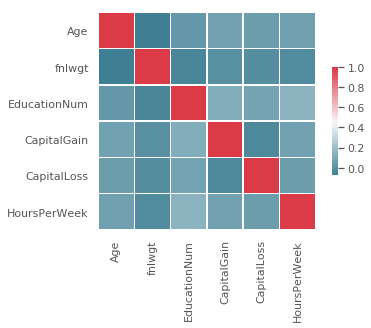

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## `fastai`

In [0]:
from fastai.tabular import * 
import torch

torch.cuda.manual_seed_all(7)

In [0]:
preprocessing = [FillMissing, Categorify, Normalize]

In [0]:
dep_var = 'Income'
cat_names = ['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender', 'NativeCountry']

In [0]:
valid_idx = range(len(data)-2000, len(data))

path="."

databunch = TabularDataBunch.from_df(path, data, dep_var, valid_idx=valid_idx, procs=preprocessing, cat_names=cat_names)

In [26]:
databunch.show_batch()

WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,NativeCountry,fnlwgt,HoursPerWeek,Age,EducationNum,CapitalGain,CapitalLoss,target
Private,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,United-States,-0.2373,-0.0338,-1.2140,-0.4186,-0.1462,-0.2161,<=50K
Private,12th,Never-married,Craft-repair,Own-child,White,Male,United-States,0.3247,-0.0338,-1.3606,-0.8076,-0.1462,-0.2161,<=50K
Private,9th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0.0693,-0.0338,1.6442,-1.9748,-0.1462,-0.2161,<=50K
State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,Germany,0.6094,2.4012,0.9846,2.3047,-0.1462,4.4776,>50K
State-gov,12th,Never-married,Exec-managerial,Not-in-family,White,Male,United-States,-0.0316,0.7779,-1.2140,-0.8076,-0.1462,-0.2161,>50K


In [78]:
train_dist = Counter(databunch.train_ds.y)
pd.DataFrame(train_dist.most_common(), columns=['Classes', '#'])

,Classes,#
0,<=50K,23235
1,>50K,7326


In [79]:
valid_dist = Counter(databunch.valid_ds.y)
pd.DataFrame(valid_dist.most_common(), columns=['Classes', '#'])

,Classes,#
0,<=50K,1485
1,>50K,515


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


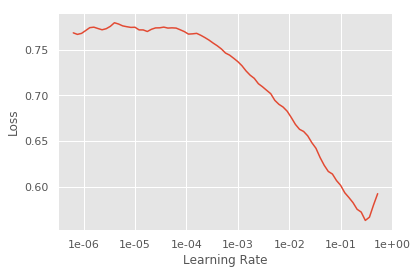

In [36]:
learn = tabular_learner(databunch, layers=[200,100], emb_szs={'NativeCountry': 10}, metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(5, max_lr=slice(1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.365516,0.350557,0.838500,00:04
1,0.321920,0.329586,0.842000,00:05
2,0.320433,0.323776,0.852000,00:04
3,0.325805,0.325966,0.847000,00:04
4,0.313125,0.323612,0.851000,00:04


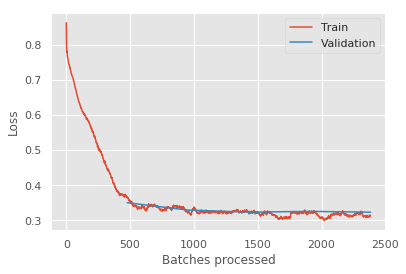

In [43]:
learn.recorder.plot_losses()

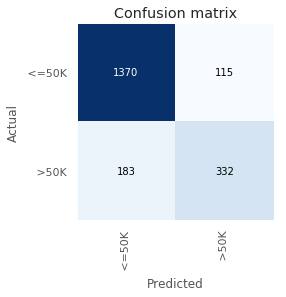

In [64]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## `h20`

In [0]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [0]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

In [3]:
# Following the same train/test split
train = data[:30561]
test = data[30561:]

train_frame = h2o.H2OFrame(train)
test_frame = h2o.h2o.H2OFrame(test)

In [36]:
# Verify the distribution is same
print('In the training set', Counter(train['Income']).most_common())
print('\nIn the testing set', Counter(test['Income']).most_common())

In the training set [(' <=50K', 23235), (' >50K', 7326)]

In the testing set [(' <=50K', 1485), (' >50K', 515)]


In [51]:
x = data.columns[0:-1]
y = data.columns[-1]

x, y

(Index(['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
        'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
        'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry'],
       dtype='object'), 'Income')

In [0]:
train_frame[y] = train_frame[y].asfactor()
test_frame[y] = test_frame[y].asfactor()

In [55]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x.tolist(), y=y, training_frame=train_frame, validation_frame=test_frame)

AutoML progress: |████████████████████████████████████████████████████████| 100%


**H2O AutoML took  1803.4340255260468 seconds.**

In [56]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190517_051139,0.927794,0.294853,0.173797,0.301101,0.0906617
StackedEnsemble_AllModels_AutoML_20190517_051139,0.927341,0.293938,0.177802,0.301006,0.0906044
GBM_1_AutoML_20190517_051139,0.927287,0.280554,0.172945,0.297822,0.0886982
GBM_2_AutoML_20190517_051139,0.926877,0.28149,0.174273,0.298392,0.0890378
XGBoost_grid_1_AutoML_20190517_051139_model_1,0.926558,0.281426,0.180692,0.298438,0.0890653
GBM_3_AutoML_20190517_051139,0.926515,0.281957,0.169478,0.298677,0.0892077
XGBoost_grid_1_AutoML_20190517_051139_model_4,0.926337,0.281744,0.176406,0.298589,0.0891556
XGBoost_1_AutoML_20190517_051139,0.925989,0.282082,0.181502,0.298905,0.0893445
XGBoost_grid_1_AutoML_20190517_051139_model_3,0.924797,0.285085,0.180002,0.300316,0.0901899
GBM_4_AutoML_20190517_051139,0.924704,0.285485,0.17366,0.300621,0.0903731


In [57]:
preds = aml.leader.predict(test_frame)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [0]:
preds = h2o.as_list(preds["predict"])

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy score", accuracy_score(test['Income'].values, preds))

Accuracy score 0.865


In [ ]:
!pip install scikit-plot

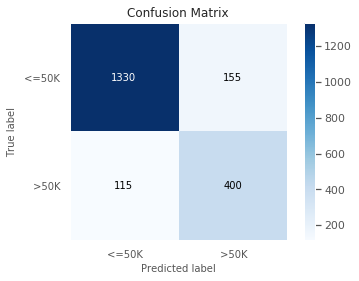

In [82]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(test['Income'].values, preds)
plt.show()

## `interpret`

> Historically, the most intelligible models were not very accurate, and the most accurate models were not intelligible. Microsoft Research has developed an algorithm called the Explainable Boosting Machine (EBM)* which has both high accuracy and intelligibility.

In [ ]:
!pip install pyscaffold
!pip install -U interpret

In [6]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(train.iloc[:, 0:-1], train['Income'], name = 'Train Data')
show(hist)

Refer to this video if you are unable to see the output of this cell: https://www.loom.com/share/1512be40265f4205a6451a97dea663e3

In [19]:
# Turning response into 0 and 1
y_train = train['Income'].apply(lambda x: 0 if x == " <=50K" else 1) 
y_test = test['Income'].apply(lambda x: 0 if x == " <=50K" else 1) 

In [20]:
from interpret.glassbox import ExplainableBoostingClassifier
import time

ebm = ExplainableBoostingClassifier(random_state=7)

start = time.time()
ebm.fit(train.iloc[:, 0:-1], y_train) 
print('It took {} seconds'.format(time.time()-start))

It took 306.07323694229126 seconds


In [21]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

If the output is not there in the above cell, here is the demo: https://www.loom.com/share/ab37697a1b70482baaf2455079f257fc

In [23]:
ebm_local = ebm.explain_local(test.iloc[:5, 0:-1], y_test[:5], name='EBM')
show(ebm_local)

Demo: https://www.loom.com/share/1655ed05299547e68bacacbbf8801ee4

In [25]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(test.iloc[:, 0:-1], y_test, name='EBM')
show(ebm_perf)

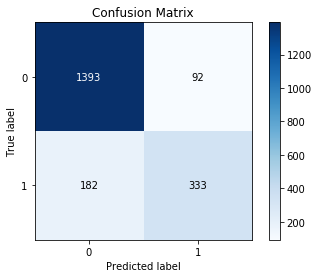

In [32]:
preds = ebm.predict(test.iloc[:, 0:-1])
skplt.metrics.plot_confusion_matrix(y_test, preds)
plt.show()

In [37]:
print(accuracy_score(y_test, preds))

0.863


- 0: <=50K
- 1: >50K

In [44]:
from sklearn.preprocessing import LabelEncoder

train_preprocessed = train.apply(LabelEncoder().fit_transform)
test_preprocessed = test.apply(LabelEncoder().fit_transform)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
start = time.time()
rf.fit(train_preprocessed.iloc[:, 0:-1], train_preprocessed['Income'])
print('It took {} seconds'.format(time.time()-start))

It took 2.0011560916900635 seconds


In [51]:
preds = rf.predict(test_preprocessed.iloc[:, 0:-1])
accuracy_score(test_preprocessed['Income'], preds)

0.7945

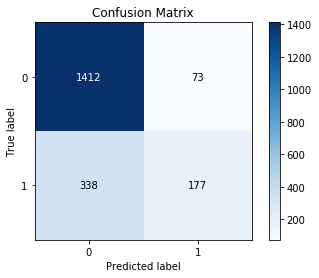

In [52]:
skplt.metrics.plot_confusion_matrix(test_preprocessed['Income'], preds)
plt.show()

In [57]:
from interpret.blackbox import LimeTabular
from interpret import show

import warnings
warnings.filterwarnings('ignore')

lime = LimeTabular(predict_fn=rf.predict_proba, data=train_preprocessed.iloc[:,0:-1], random_state=7)

lime_local = lime.explain_local(test_preprocessed.iloc[:5, 0:-1],
                                test_preprocessed['Income'][:5], name='LIME')

show(lime_local)

Demo: https://www.loom.com/share/c8e194eacb934ebabd8735b6d2300ce2

In [59]:
from interpret.blackbox import MorrisSensitivity

sensitivity = MorrisSensitivity(predict_fn=rf.predict_proba, data=train_preprocessed.iloc[:,0:-1])
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

Demo: https://www.loom.com/share/d19a9b56d97f48da85e9d02681e96b0c

In [61]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(predict_fn=rf.predict_proba, data=train_preprocessed.iloc[:,0:-1])
pdp_global = pdp.explain_global(name='Partial Dependence')

show(pdp_global)

Demo: https://www.loom.com/share/8f31af4ec336476e9d18bcac106e10b3

In [63]:
show([lime_local, sensitivity_global, pdp_global])

Open in new window

Demo: https://www.loom.com/share/13e1434c52d142dab06d0f7b0595983d